In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train['source'] = 'train'
test['source'] = 'test'

In [9]:
black_friday = pd.concat([train, test], ignore_index=True ,sort=False)

In [10]:
black_friday.shape

(783667, 13)

In [11]:
train.shape[0] + test.shape[0]

783667

In [12]:
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

In [14]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [ ]:
# Univariate Variable Analysis
# Categorical Variables

In [44]:
categorical_variables = train.select_dtypes(include=['object'])
categorical_variables.dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
source                        object
dtype: object

In [55]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

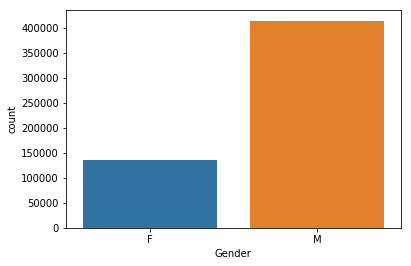

In [20]:
sns.countplot(train['Gender'])

In [45]:
age_count = train['Age'].value_counts()

In [46]:
age_count

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

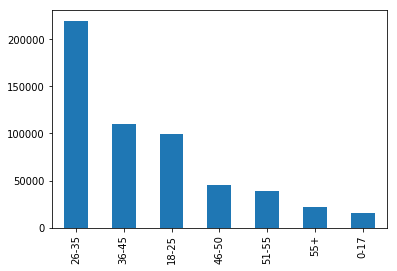

In [51]:
age_count.plot(kind='bar')

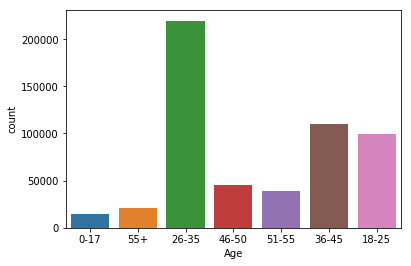

In [48]:
sns.countplot(train['Age'])

In [58]:
marital_count = train['Marital_Status'].value_counts()

In [59]:
marital_count

0    324731
1    225337
Name: Marital_Status, dtype: int64

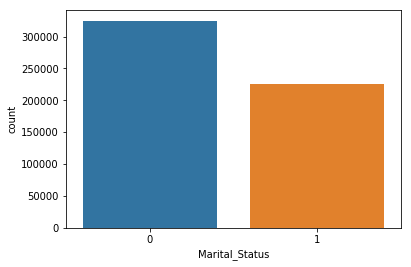

In [60]:
sns.countplot(train['Marital_Status'])

In [63]:
categorical_variables.dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
source                        object
dtype: object

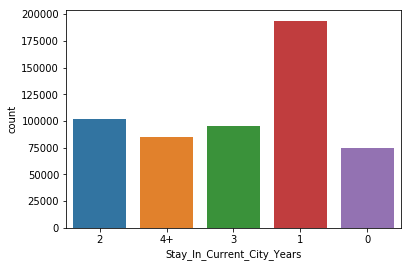

In [64]:
sns.countplot(train['Stay_In_Current_City_Years'])

In [66]:
numerical_variables = train.select_dtypes(include=[np.number])

In [ ]:
# Numeric Variables 

In [68]:
numerical_variables.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

Text(0.5, 1.0, 'Purchase Amount Distribution')

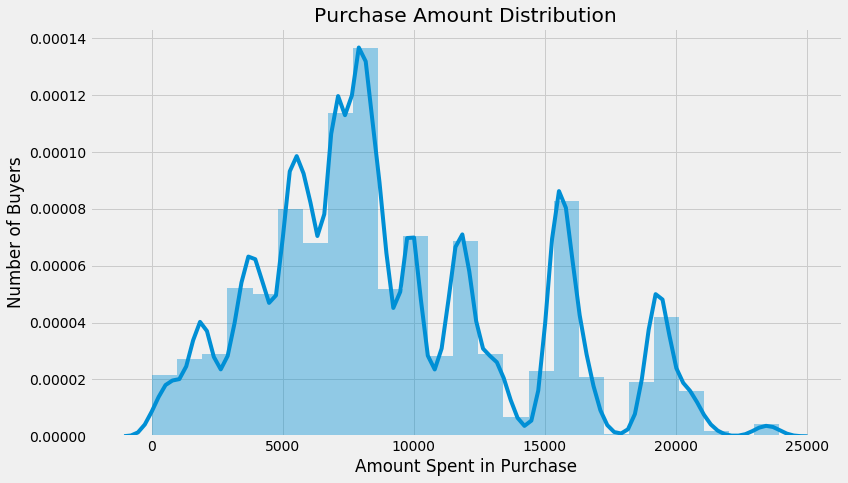

In [72]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train['Purchase'], bins=25)
plt.xlabel('Amount Spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase Amount Distribution')

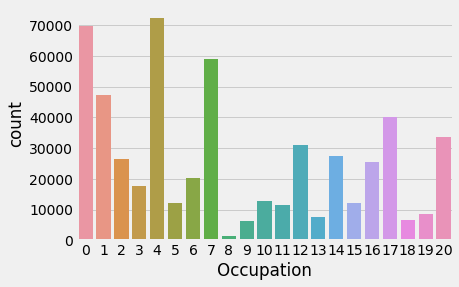

In [76]:
plt.style.use('fivethirtyeight')
sns.countplot(train['Occupation'])


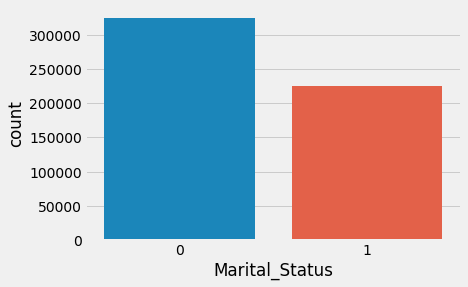

In [77]:
sns.countplot(train['Marital_Status'])

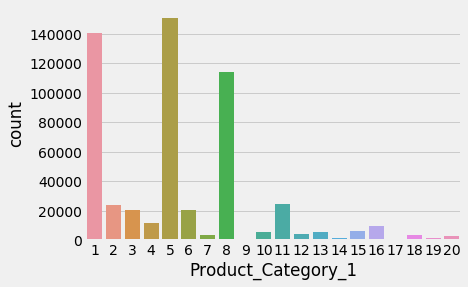

In [81]:
sns.countplot(train['Product_Category_1']); 

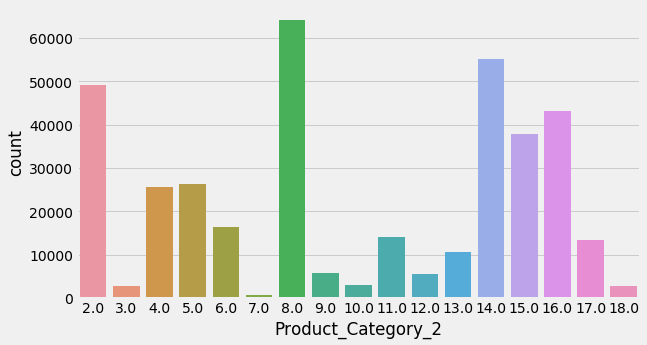

In [86]:
plt.figure(figsize=(9,5))
sns.countplot(train['Product_Category_2'])

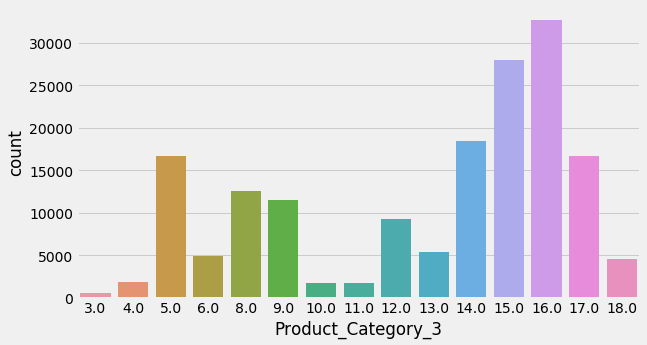

In [87]:
plt.figure(figsize=(9,5))
sns.countplot(train['Product_Category_3']); 

In [88]:
# Bivariate Variable

In [104]:
gender_avg_purchase = pd.pivot_table(data=train, index='Gender', values='Purchase', aggfunc='mean')

In [105]:
gender_avg_purchase

,Purchase
Gender,
F,8734.565765
M,9437.526040


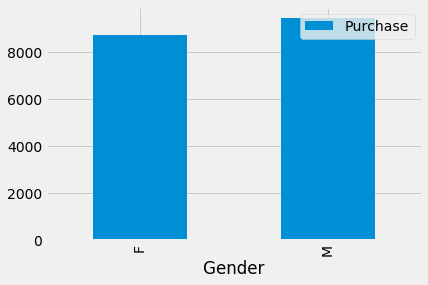

In [106]:
gender_avg_purchase.plot(kind='bar')

In [107]:
gender_status_avg_purchase = pd.pivot_table(data=train, index='Gender', columns='Marital_Status', values='Purchase', aggfunc='mean')

In [108]:
gender_status_avg_purchase

Marital_Status,0,1
Gender,,
F,8679.845815,8810.249789
M,9453.756740,9413.817605


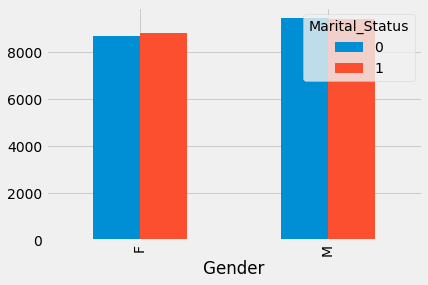

In [109]:
gender_status_avg_purchase.plot(kind='bar')

In [111]:
train.pivot_table(index='Gender', columns='City_Category', values='Purchase')

City_Category,A,B,C
Gender,,,
F,8579.708576,8540.677694,9130.107518
M,9017.834470,9354.854433,9913.567248


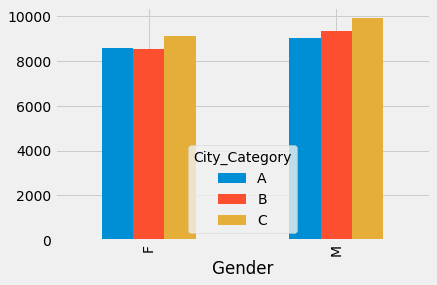

In [112]:
train.pivot_table(index='Gender', columns='City_Category', values='Purchase').plot(kind='bar')

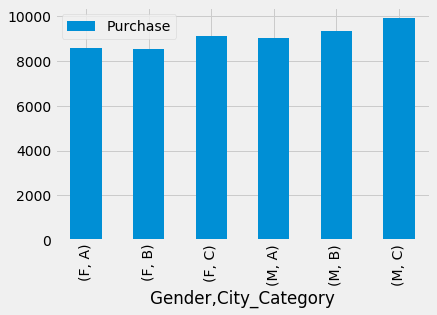

In [114]:
train.pivot_table(index=['Gender','City_Category'], values='Purchase').plot(kind='bar')

In [124]:
corr = numerical_variables.corr()


In [127]:
corr['Purchase'].sort_values(ascending=False)[:10]

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

In [128]:
# Correlation Matrix

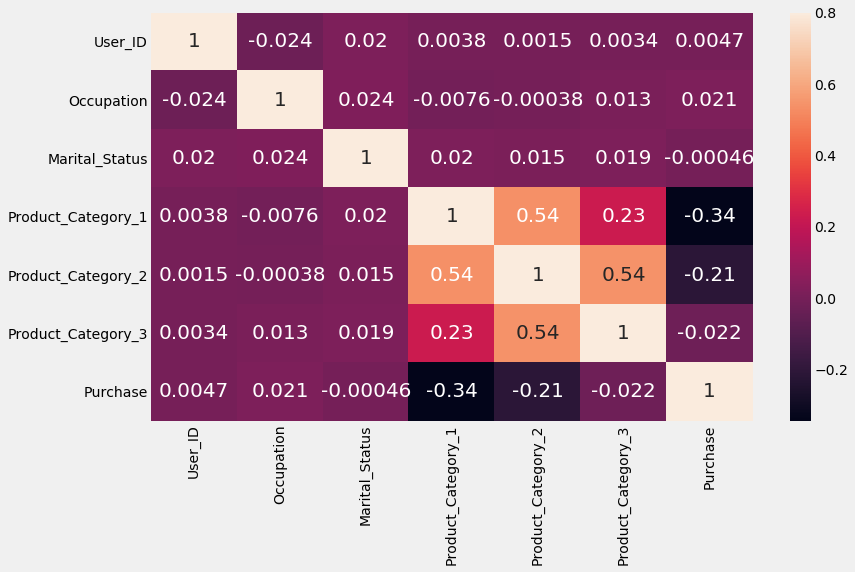

In [136]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, vmax=0.8, annot_kws={'size' : 20}, annot=True)

In [137]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [139]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [148]:
black_friday['Product_Category_2'].fillna(np.mean, inplace = True)

In [143]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [147]:
black_friday['Product_Category_3'].fillna(np.mean, inplace=True)

In [146]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [149]:
black_friday['Product_Category_2'].value_counts().sort_index()

0.0     245982
2.0      70498
3.0       4123
4.0      36705
5.0      37165
6.0      23575
7.0        854
8.0      91317
9.0       8177
10.0      4420
11.0     20230
12.0      7801
13.0     15054
14.0     78834
15.0     54114
16.0     61687
17.0     19104
18.0      4027
Name: Product_Category_2, dtype: int64

In [153]:
black_friday['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], dtype=object)

In [154]:
# Feature Engineering

In [155]:
black_friday['Gender'] = black_friday['Gender'].map({
        'M' : 1,
        'F' : 0
    })

In [156]:
black_friday['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [157]:
black_friday['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [158]:
black_friday['Age'] = black_friday['Age'].map({
        '0-17' : 0,
        '18-25' :1,
        '26-35': 2,
        '36-45' :3,
        '46-50' : 4,
        '51-55' : 5,
        '55+' :6      
    })

In [161]:
black_friday['Age'].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

In [162]:
black_friday['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [163]:
black_friday['City_Category'] = black_friday['City_Category'].map({
        'A' : 0,
        'B' : 1,
        'C' : 2
    })

In [164]:
black_friday.City_Category.value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [165]:
black_friday.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [167]:
black_friday['Stay_In_Current_City_Years'] = le.fit_transform(black_friday['Stay_In_Current_City_Years'])

In [168]:
black_friday['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [169]:
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

In [173]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [176]:
# black_friday['User_ID_Count'] = getCountVar(black_friday, black_friday, 'User_ID')